In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [3]:
concrete_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )

In [4]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


In [5]:
concrete_data = concrete_data.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash','Water  (component 4)(kg in a m^3 mixture)': 'Water', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate', 'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age', 'Concrete compressive strength(MPa, megapascals)':'Concrete compressive strength'}, inplace = False)

In [6]:
concrete_data = concrete_data.rename(columns=lambda x: x.strip())

In [7]:
concrete_data.dtypes

Cement                                             float64
Blast Furnace Slag                                 float64
Fly Ash                                            float64
Water                                              float64
Superplasticizer                                   float64
Coarse Aggregate                                   float64
Fine Aggregate                                     float64
Age                                                  int64
Concrete compressive strength(MPa, megapascals)    float64
dtype: object

In [8]:
concrete_data.isnull().sum()

Cement                                             0
Blast Furnace Slag                                 0
Fly Ash                                            0
Water                                              0
Superplasticizer                                   0
Coarse Aggregate                                   0
Fine Aggregate                                     0
Age                                                0
Concrete compressive strength(MPa, megapascals)    0
dtype: int64

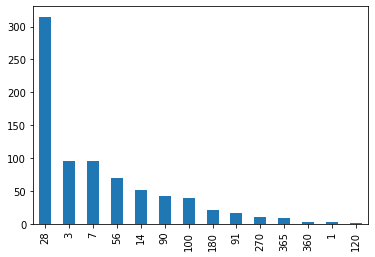

In [9]:
concrete_data['Age'].value_counts().plot.bar()

In [10]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,"Concrete compressive strength(MPa, megapascals)"
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,280.722565,76.496140,52.701347,182.361593,6.000848,971.558782,771.618355,44.993523,35.724196
std,104.711803,87.477423,63.596763,20.913641,5.844002,77.078828,79.785875,60.442735,16.797389
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.677500,0.000000,932.000000,724.300000,12.250000,23.677591
50%,275.000000,24.000000,0.000000,185.700000,6.050000,968.000000,777.800000,28.000000,33.870853
75%,350.000000,144.775000,118.187500,193.000000,10.025000,1028.100000,821.000000,56.000000,46.232813
max,540.000000,359.400000,200.100000,237.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
concrete_data.shape

(772, 9)

In [12]:
matrix = concrete_data.corr()

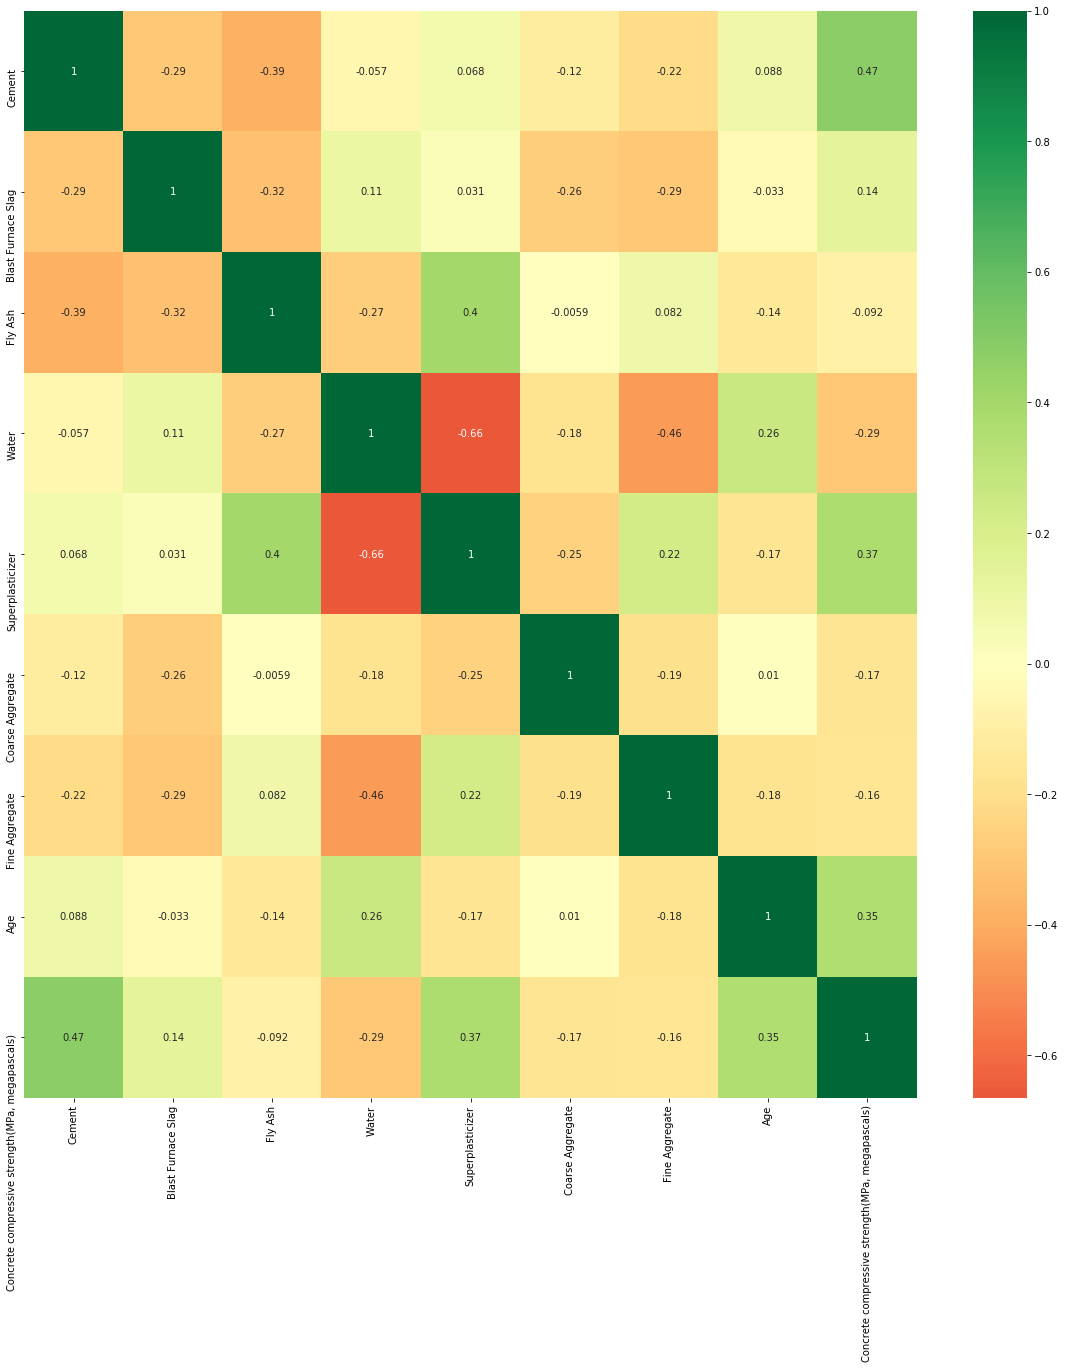

In [13]:
plt.figure(figsize=(20,20))
p=sns.heatmap(matrix, annot=True, cmap='RdYlGn',center=0) 

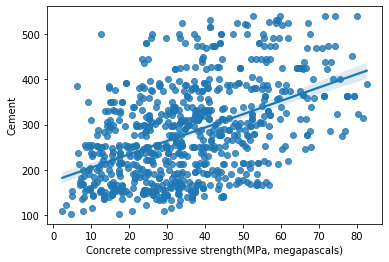

In [14]:
sns.regplot('Concrete compressive strength(MPa, megapascals)', 'Cement', data =concrete_data)

In [15]:
X= concrete_data.drop('Concrete compressive strength(MPa, megapascals)',1)
y= concrete_data['Concrete compressive strength(MPa, megapascals)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(540, 8)
(232, 8)
(540,)
(232,)


In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 6)             
rfe = rfe.fit(X_train, y_train)

In [19]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Cement', True, 1),
 ('Blast Furnace Slag', True, 1),
 ('Fly Ash', True, 1),
 ('Water', True, 1),
 ('Superplasticizer', True, 1),
 ('Coarse Aggregate', False, 3),
 ('Fine Aggregate', False, 2),
 ('Age', True, 1)]

In [20]:
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Age'],
      dtype='object')

In [21]:
X_train_rfe = X_train[imp_columns]

In [22]:
random.seed(0)
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()
print(lm_rfe.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                           OLS Regression Results                                          
Dep. Variable:     Concrete compressive strength(MPa, megapascals)   R-squared:                       0.640
Model:                                                         OLS   Adj. R-squared:                  0.636
Method:                                              Least Squares   F-statistic:                     157.9
Date:                                             Mon, 31 Aug 2020   Prob (F-statistic):          8.28e-115
Time:                                                     21:20:56   Log-Likelihood:                -2018.4
No. Observations:                                              540   AIC:                             4051.
Df Residuals:                                                  533   BIC:                             4081.
Df Model:                                                        6                                         
Covariance Type:            

,Features,VIF
3,Water,21.41
0,Cement,14.32
2,Fly Ash,3.87
4,Superplasticizer,3.81
1,Blast Furnace Slag,3.06
5,Age,1.66


In [23]:
X_train_rfe1 = X_train_rfe.drop(['Water'], 1,)
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()
print(lm_rfe1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                           OLS Regression Results                                          
Dep. Variable:     Concrete compressive strength(MPa, megapascals)   R-squared:                       0.586
Model:                                                         OLS   Adj. R-squared:                  0.582
Method:                                              Least Squares   F-statistic:                     151.1
Date:                                             Mon, 31 Aug 2020   Prob (F-statistic):          9.20e-100
Time:                                                     21:20:56   Log-Likelihood:                -2056.2
No. Observations:                                              540   AIC:                             4124.
Df Residuals:                                                  534   BIC:                             4150.
Df Model:                                                        5                                         
Covariance Type:            

,Features,VIF
3,Superplasticizer,2.90
0,Cement,2.70
2,Fly Ash,1.92
1,Blast Furnace Slag,1.56
4,Age,1.54


In [24]:
X_train_stepwise = X_train[['Superplasticizer','Cement','Fly Ash','Blast Furnace Slag','Age']]
X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise = sm.OLS(y_train, X_train_stepwise).fit()
print(lm_stepwise.summary())

                                           OLS Regression Results                                          
Dep. Variable:     Concrete compressive strength(MPa, megapascals)   R-squared:                       0.586
Model:                                                         OLS   Adj. R-squared:                  0.582
Method:                                              Least Squares   F-statistic:                     151.1
Date:                                             Mon, 31 Aug 2020   Prob (F-statistic):          9.20e-100
Time:                                                     21:20:56   Log-Likelihood:                -2056.2
No. Observations:                                              540   AIC:                             4124.
Df Residuals:                                                  534   BIC:                             4150.
Df Model:                                                        5                                         
Covariance Type:            

In [25]:
X_test_stepwise = X_test[['Superplasticizer','Cement','Fly Ash','Blast Furnace Slag','Age']]
X_test_stepwise = sm.add_constant(X_test_stepwise)
actual     = y_test
prediction = lm_stepwise.predict(X_test_stepwise)

In [26]:
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

120.82931453208712


In [27]:
rmse = math.sqrt(model_mse)
print(rmse)

10.99223883165241


In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
mean_absolute_percentage_error(actual, prediction)

31.205745377928036

# Using Lasso

In [30]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
reg = linear_model.Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso = GridSearchCV(reg, parameters, scoring= mean_squared_error, cv=5)
reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
y_pred = reg.predict(X_test)

In [32]:
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

119.91219974682751


In [33]:
rmse = math.sqrt(model_mse)
print(rmse)

10.95044290185687


In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
mean_absolute_percentage_error(y_test, y_pred)

31.150727639403136

# Using BayesianRidge

In [36]:
from sklearn import linear_model
reg1 = linear_model.BayesianRidge()
reg1.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [37]:
y_pred = reg.predict(X_test)

In [38]:
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

119.91219974682751


In [39]:
rmse = math.sqrt(model_mse)
print(rmse)

10.95044290185687


In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
mean_absolute_percentage_error(y_test, y_pred)

31.150727639403136

# Support Vector Regressor

In [42]:
from sklearn.svm import LinearSVR
regr = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive',random_state=0)
regr.fit(X_train, y_train)

C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=0.0001, verbose=0)

In [44]:
regr.score(X_train,y_train)

0.5855603086356143

In [45]:
y_pred = regr.predict(X_test)

In [46]:
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

126.38133487225303


In [47]:
rmse = math.sqrt(model_mse)
print(rmse)

11.241945333093069


In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
mean_absolute_percentage_error(y_test, y_pred)

28.32427613706818

# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
dct1 = DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=35,min_samples_split=2,min_samples_leaf=1)
dct1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=35,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
y_pred = dct1.predict(X_test)

In [52]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

46.35222082989124


In [53]:
rmse = math.sqrt(mse)
print(rmse)

6.808246531221621


In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
mean_absolute_percentage_error(y_test, y_pred)

16.375829786034924

In [56]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')

In [57]:
test_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,167.00,187.00,195.00,185.00,7.00,898.0,636.00,28
1,148.50,139.40,108.60,192.70,6.10,892.4,780.00,28
2,154.80,0.00,142.80,193.30,9.10,877.2,867.70,28
3,236.00,0.00,0.00,193.00,0.00,968.0,885.00,365
4,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,14


In [58]:
test_data.shape

(258, 8)

In [59]:
predicton = dct1.predict(test_data)

In [60]:
prediction.head()

201    29.021784
538    57.941998
282    50.669375
163    61.299314
278    54.670767
dtype: float64

In [61]:
prediction.to_csv("C:/Users/CHANDRU/Desktop/prediction_results.csv", index=False)